In [87]:
import pandas as pd
import geopandas as gdp
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry

In [88]:
df = pd.read_pickle("../pickles/utseus-cendus-shanghai-neighborhoods.pk")

In [89]:
geometry = df['geometry']
crs = {'init': 'epsg:4479'}

In [90]:
gdf = gdp.GeoDataFrame(df, crs=crs, geometry=geometry)

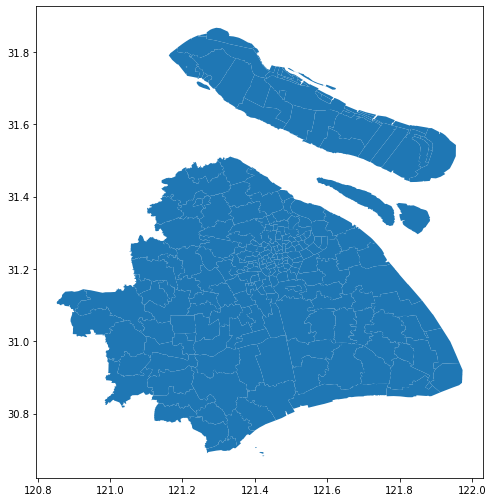

In [91]:
gdf.plot(figsize=(8,15))

In [92]:
mobike_df = pd.read_pickle('../pickles/utseus-mobike-2016.pk')

In [93]:
mobike_df.head()

,orderid,bikeid,userid,start_time,start_location_x,start_location_y,end_time,end_location_x,end_location_y,track
0,1,324731,7541,2016-08-28 00:00,121.49,31.28,2016-08-28 00:08,121.486,31.273,"121.485,31.275#121.485,31.276#121.486,31.273#1..."
1,6,288841,4427,2016-08-28 00:00,121.462,31.313,2016-08-28 00:17,121.455,31.315,"121.455,31.313#121.455,31.314#121.455,31.315#1..."
2,8,315873,6474,2016-08-28 00:00,121.416,31.154,2016-08-28 00:14,121.419,31.156,"121.416,31.154#121.416,31.155#121.417,31.155#1..."
3,10,93155,12616,2016-08-28 00:00,121.436,31.32,2016-08-28 00:12,121.444,31.31,"121.436,31.318#121.436,31.319#121.436,31.320#1..."
4,11,352484,11596,2016-08-28 00:00,121.459,31.325,2016-08-28 00:08,121.46,31.315,"121.459,31.315#121.459,31.316#121.459,31.317#1..."


In [94]:
mobike_df = mobike_df.drop(['orderid', 'bikeid','start_time', 'end_time','end_location_x', 'end_location_y','track','userid'],axis=1)

In [95]:
mobike_df.head()

,start_location_x,start_location_y
0,121.49,31.28
1,121.462,31.313
2,121.416,31.154
3,121.436,31.32
4,121.459,31.325


In [97]:
mobike_df['start_location_x'] = mobike_df['start_location_x'].apply(lambda x: float(x))
mobike_df['start_location_y'] = mobike_df['start_location_y'].apply(lambda x: float(x))

In [98]:
geometry = [Point(xy) for xy in zip(mobike_df['start_location_x'], mobike_df['start_location_y'])]
mobike_df['geometry'] = geometry

In [99]:
mobike_df.head()

,start_location_x,start_location_y,geometry
0,121.490,31.280,POINT (121.49 31.28)
1,121.462,31.313,POINT (121.462 31.313)
2,121.416,31.154,POINT (121.416 31.154)
3,121.436,31.320,POINT (121.436 31.32)
4,121.459,31.325,POINT (121.459 31.325)


In [140]:
gdf_mobike = mobike_df['geometry']
gdf_mobike.head()

0      POINT (121.49 31.28)
1    POINT (121.462 31.313)
2    POINT (121.416 31.154)
3     POINT (121.436 31.32)
4    POINT (121.459 31.325)
Name: geometry, dtype: object

In [141]:
print(type(gdf_mobike))

<class 'pandas.core.series.Series'>


In [142]:
gdf_mobike = gdf_mobike[0:20000]
gdf_mobike.head()

0      POINT (121.49 31.28)
1    POINT (121.462 31.313)
2    POINT (121.416 31.154)
3     POINT (121.436 31.32)
4    POINT (121.459 31.325)
Name: geometry, dtype: object

In [143]:
len(gdf_mobike)

20000

In [144]:
df['nb_mobike'] = 0
df['nb_mobike'].head()

0    0
1    0
2    0
3    0
4    0
Name: nb_mobike, dtype: int64

In [145]:
for j, mobike in gdf_mobike.items():    
    for i, area in df.iterrows():
        if mobike.within(area['geometry']):
            df.set_value(i,'nb_mobike', df.iloc[i]['nb_mobike']+1)

C:\Users\sebr\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [146]:
df.max()

TYPE           2
nb_mobike    863
dtype: int64

In [147]:
df.to_pickle("../pickles/savedDF_mobike.pkl")